In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/Data/wikipedia.csv")

In [4]:
confirmed = data.cases
confirmed

0           42
1           57
2           85
3          111
4          175
        ...   
138    3585701
139    3651090
140    3714681
141    3770577
142    3834073
Name: cases, Length: 143, dtype: int64

In [5]:
x = np.arange(len(confirmed))
x = add_constant(x)

In [6]:
model = OLS(np.log(confirmed[:122]), x[:122]) 

In [7]:
result = model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     255.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.57e-31
Time:                        00:00:01   Log-Likelihood:                -229.92
No. Observations:                 122   AIC:                             463.8
Df Residuals:                     120   BIC:                             469.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5858      0.289     29.702      0.000       8.013       9.158
x1             0.0660      0.004     15.994      0.000       0.058       0.074
==============================================================================
Omnibus:                       14.615   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.282
Skew:                          -0.881   Prob(JB):                     0.000291
Kurtosis:                       3.317   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

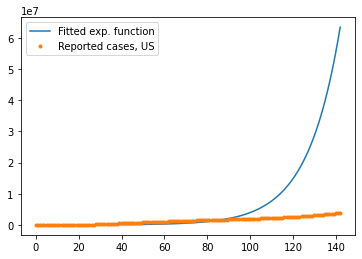

In [9]:
plt.plot(
    np.exp(result.predict(x)),
    #np.exp(result.predict(x[:30])),
    label="Fitted exp. function"      
)
plt.plot(confirmed, ".", label="Reported cases, US")
# plt.plot(confirmed[:21], ".", label="Reported cases, US")
plt.legend()
plt.show()

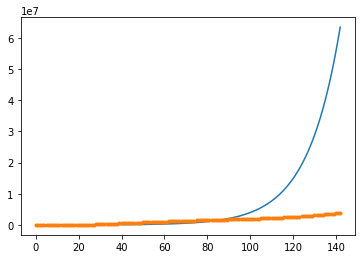

In [10]:
#Not sure what the difference is between this graph and the previous one
plt.plot(np.exp(result.predict(x)))
plt.plot(confirmed, ".")
# plt.plot(np.exp(result.predict(x[:16])))
# plt.plot(confirmed[:16], ".")
plt.show()

In [11]:
Exponential_Predictions_143 = np.exp(result.predict(x[:143]))
len(Exponential_Predictions_143)

143

In [12]:
print(Exponential_Predictions_143)
#Seemingly relevant to the exponential function graph.Proably the right values.
#e+(some 2-digit number): scientific notation with the number referring to the power of 10 as a factor

[5.35499783e+03 5.72061500e+03 6.11119501e+03 6.52844221e+03
 6.97417733e+03 7.45034541e+03 7.95902427e+03 8.50243364e+03
 9.08294476e+03 9.70309078e+03 1.03655778e+04 1.10732967e+04
 1.18293358e+04 1.26369941e+04 1.34997959e+04 1.44215063e+04
 1.54061473e+04 1.64580156e+04 1.75817010e+04 1.87821071e+04
 2.00644719e+04 2.14343913e+04 2.28978432e+04 2.44612135e+04
 2.61313244e+04 2.79154635e+04 2.98214162e+04 3.18574996e+04
 3.40325983e+04 3.63562038e+04 3.88384555e+04 4.14901852e+04
 4.43229640e+04 4.73491532e+04 5.05819582e+04 5.40354858e+04
 5.77248060e+04 6.16660178e+04 6.58763192e+04 7.03740827e+04
 7.51789350e+04 8.03118427e+04 8.57952042e+04 9.16529471e+04
 9.79106325e+04 1.04595567e+05 1.11736921e+05 1.19365857e+05
 1.27515666e+05 1.36221910e+05 1.45522580e+05 1.55458262e+05
 1.66072311e+05 1.77411044e+05 1.89523939e+05 2.02463852e+05
 2.16287249e+05 2.31054451e+05 2.46829896e+05 2.63682424e+05
 2.81685573e+05 3.00917902e+05 3.21463336e+05 3.43411527e+05
 3.66858251e+05 3.919058

In [13]:
from numpy import savetxt
savetxt('Exponential_Predictions_143.csv', Exponential_Predictions_143, delimiter=',')